# Machine Learning Linear Regression

- Author: Oluwafemi Salawu
- Date:   06/14/2025
- https://github.com/Airfirm/datafun-07-ml

Section 1. Imports

In [770]:
import sklearn
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1 - Chart a Straight Line.

Section 10.16 Snippets
- This file includes the Self Check snippets which continue from the section body.

- Time Series
- Simple Linear Regression
- Linear Relationships

Display the linear relationship between the Celsius vs Fahrenheit

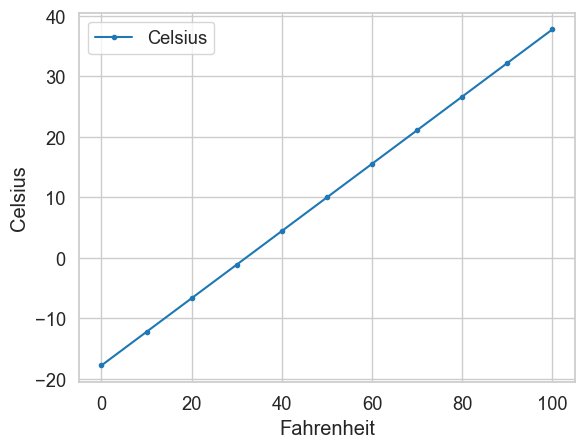

In [771]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

# import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction.

## Part 3 - Prediction.
#### Repeating the Part 2 - Prediction process except for changing the variable name from nyc_df to df

### Section 1 - Data Acquisition

Components of the Simple Linear Regression Equation
- SciPy’s stats Module
- Pandas
- Seaborn Visualization
- Getting Weather Data from NOAA

In [772]:
# Loading the Average High Temperatures into a DataFrame
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [773]:
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [774]:
df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [775]:
# Cleaning the Data
df.columns = ['Date', 'Temperature', 'Anomaly']

In [776]:
df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [777]:
df.Date.dtype

dtype('int64')

In [778]:
df.Date = df.Date.floordiv(100)


In [779]:
df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [780]:
# Calculating Basic Descriptive Statistics for the Dataset
pd.set_option('display.precision', 2)

df['Temperature'].describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [781]:
# Forecasting Future January Average High Temperatures
# from scipy import stats

linear_regression = stats.linregress(x=df.Date,
                                     y=df.Temperature)


In [782]:
linear_regression.slope

np.float64(0.014771361132966163)

In [783]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
#### the 'average high temp in Jan' for the year 2024

In [784]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

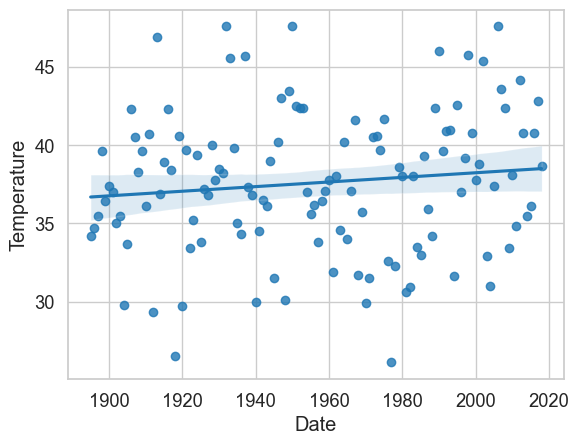

In [785]:
# Plotting the Average High Temperatures and a Regression Line
# import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=df.Date, y=df.Temperature)

(10.0, 70.0)

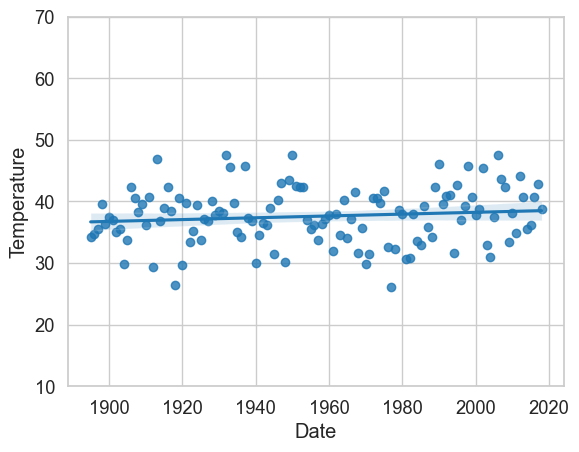

In [786]:
# Plotting the Average High Temperatures and a Regression Line
# import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=df.Date, y=df.Temperature)

axes.set_ylim(10, 70)

In [787]:
# Getting Time Series Datasets

# Self Check Exercises 
# Exercise 3
year = 2024

slope = linear_regression.slope

intercept = linear_regression.intercept

temperature = slope * year + intercept

while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept

year

2120

## Part 3 - Prediction.

### Section 1 - Build the Model

### Imports

In [788]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [789]:
# Splitting the Data for Training and Testing
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)


In [790]:
# Checking the Shape of the Training Set
X_train.shape

(93, 1)

In [791]:
# Checking the Shape of the Testing Set
X_test.shape

(31, 1)

In [792]:
# Training the Model
# from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [793]:
# Training the Model
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [794]:
# Getting the Coefficients
linear_regression.coef_

array([0.01939167])

In [795]:
# Getting the Intercept
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [796]:
# Testing the Model
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [797]:
# Predicting Future Temperatures and Estimating Past Temperatures

predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Section 4 - Visualizations

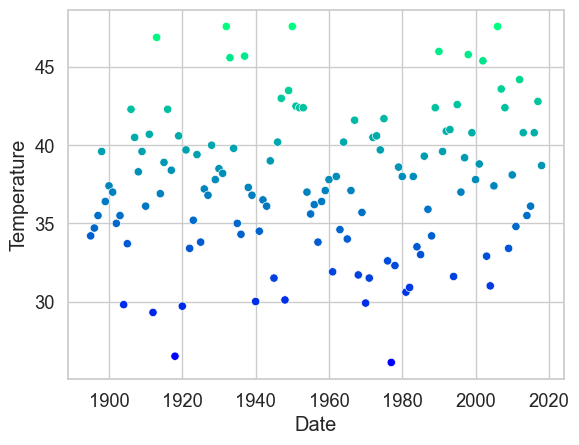

In [798]:
# Visualizing the Dataset with the Regression Line
# import seaborn as sns

axes = sns.scatterplot(data=df, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

(10.0, 70.0)

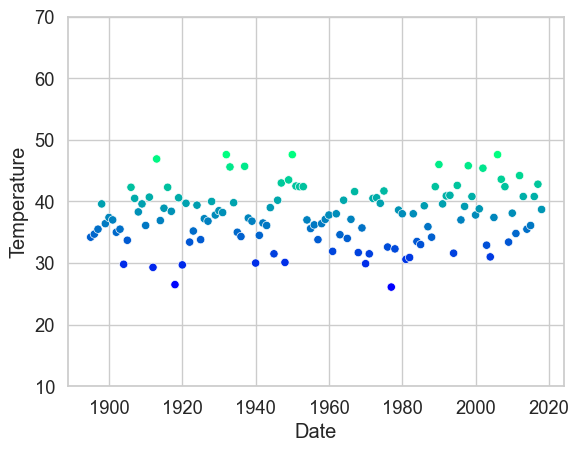

In [799]:
# Visualizing the Dataset with the Regression Line
# import seaborn as sns

axes = sns.scatterplot(data=df, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

In [800]:
# Visualizing the Dataset with the Regression Line
# import numpy as np

x = np.array([min(df.Date.values), max(df.Date.values)])

y = predict(x)

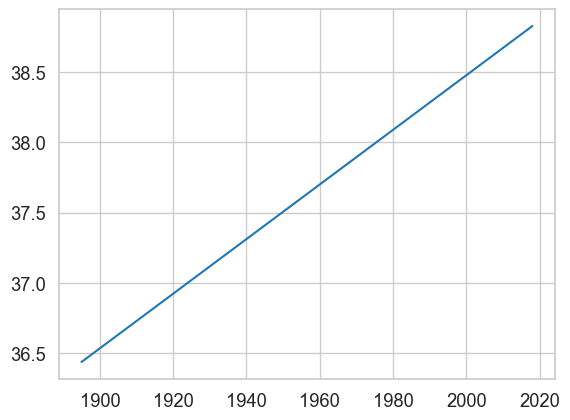

In [801]:
# Visualizing the Dataset with the Regression Line
# import matplotlib.pyplot as plt 

line = plt.plot(x, y)

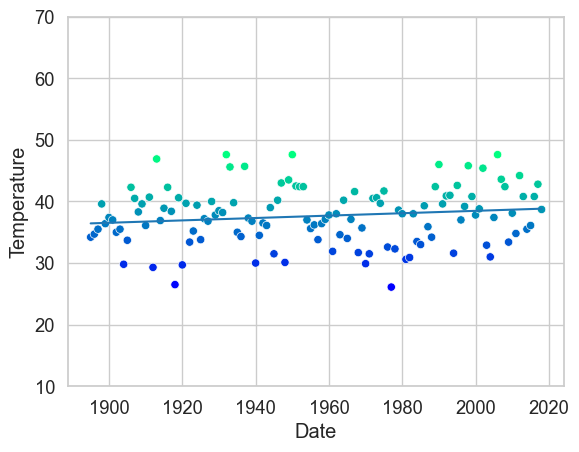

In [802]:
# Visualizing the Dataset with the Regression Line
# import seaborn as sns

axes = sns.scatterplot(data=df, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(df.Date.values), max(df.Date.values)])

y = predict(x)

line = plt.plot(x, y)

# 15.4 Self Check
# Exercise 3
predict(1889)

predict(2020)

In [803]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

predict(2020)

array([38.86338185])

In [804]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

predict(1889)

array([36.32307265])

## Part 4 - Insights

Here are the key differences between the two processes:

### **1. Modeling Approach**
| **Section 5-7 Process** | **Section 1-3 Process** |
|-------------------------|-------------------------|
| Uses **SciPy's `linregress()`** for simple linear regression (closed-form solution) | Uses **scikit-learn's `LinearRegression()`** with train-test split (machine learning approach) |
| Fits a regression line on **all data at once** | Splits data into **training/testing sets** for evaluation |
| Best for quick, statistical analysis | Better for predictive modeling and generalization checks |

### **2. Data Handling**
| **Section 5-7** | **Section 1-3** |
|-----------------|-----------------|
| No data splitting (uses full dataset) | Explicit `train_test_split()` (80/20 or similar) |
| No evaluation metrics (assumes perfect fit) | Tests model on unseen data (MSE, R²) |
| Statistical inference (p-values, std error from `linregress`) | ML-focused (coefficients, intercept) |

### **3. Output & Use Case**
| **Section 5-7** | **Section 1-3** |
|-----------------|-----------------|
| **Equation**: Direct slope/intercept from `linregress` | **Equation**: From `model.coef_` and `model.intercept_` |
| Good for **exploratory analysis** | Better for **predictive accuracy** |
| No validation of model performance | Includes model testing/validation |

### **4. Visualization (Similarities)**
Both processes:
- Use Seaborn's `regplot()` for plotting.
- Customize axes (e.g., `ylim=(10, 70)`).
- Predict 2024 temperatures (same end goal).

---

### **When to Use Each:**
- **SciPy (`linregress`)**  
  - Quick statistical analysis.  
  - When you need p-values/std errors.  
  - No need for train-test evaluation.  

- **scikit-learn (`LinearRegression`)**  
  - Building ML models.  
  - Evaluating generalization performance.  
  - Future-proofing for more complex models.  

### **Code Comparison**
#### **Section 5-7 (SciPy)**
```python
from scipy.stats import linregress
```

#### **Section 1-3 (scikit-learn)**
```python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)
```

### **Key Takeaway**
- **SciPy**: Simpler, statistical focus.  
- **scikit-learn**: More robust for ML workflows.  

### **Conclusions Summary: Two Approaches to Linear Regression**

#### **1. Core Differences**
| **Aspect**               | **SciPy `linregress` (Sections 5-7)**       | **scikit-learn `LinearRegression` (Sections 1-3)** |
|--------------------------|--------------------------------------------|--------------------------------------------------|
| **Purpose**              | Statistical analysis                       | Machine learning modeling                        |
| **Data Handling**        | Uses all data (no train-test split)        | Splits data into training/testing sets           |
| **Model Evaluation**     | Provides p-values, std error (statistical) | Uses MSE/R² (predictive performance)             |
| **Complexity**           | Simple, one-step calculation               | Requires pipeline (fit/predict/evaluate)         |
| **Best For**             | Quick trend analysis                       | Robust predictive modeling                       |

---

#### **2. When to Use Each**
- **Choose SciPy's `linregress` if:**  
  - You need **statistical insights** (p-values, confidence intervals).  
  - Working with **small datasets** where train-test splitting isn’t critical.  
  - Prioritizing **simplicity** over predictive rigor.  

- **Choose scikit-learn's `LinearRegression` if:**  
  - You want to **evaluate model generalization** (test on unseen data).  
  - Planning to **scale to more complex models** (e.g., polynomial regression).  
  - Need **compatibility with ML workflows** (pipelines, hyperparameter tuning).  

---

#### **3. Key Takeaways**
1. **Statistical vs. Predictive Focus**:  
   - SciPy is for **understanding relationships** (slope, significance).  
   - scikit-learn is for **building deployable models**.  

2. **Validation Matters**:  
   - SciPy assumes your data = ground truth.  
   - scikit-learn **tests generalizability** via train-test splits.  

3. **Output Similarities**:  
   Both methods will give you:  
   - A regression line equation (`y = mx + b`).  
   - Predictions (e.g., 2024 temperature).  
   - Visualization capabilities (Seaborn `regplot`).  

---

1. **SciPy’s `linregress`** is ideal for quick statistical analysis, providing slope, intercept, and p-values, but lacks train-test validation.  
2. **scikit-learn’s `LinearRegression`** enables robust ML workflows with train-test splits, ensuring model generalizability via metrics (MSE/R²).  
3. Both methods yield similar regression equations (*y = mx + b*), but scikit-learn is better for predictive accuracy on unseen data.  
4. Use **`linregress`** for exploratory trends and **`LinearRegression`** for deployable models requiring rigorous testing.  
5. The choice hinges on goals: **statistical insight (SciPy)** vs. **predictive reliability (scikit-learn)**.  

Each has strengths—pick based on your project’s needs!

## Different method entirely to handling PART 3 - PREDICTION.

In [805]:
# Prepare data for modeling
x = df[['Date']] # Independent variable 
y= df['Temperature'] # Dependent variable


In [806]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [807]:
# Check shapes
print("Training set shapes:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print("\nTesting set shapes:")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

Training set shapes:
x_train: (99, 1), y_train: (99,)

Testing set shapes:
x_test: (25, 1), y_test: (25,)


In [808]:
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [809]:
# Get the coefficients
print("\nModel coefficients:")
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.4f}")
print(f"Equation: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")


Model coefficients:
Slope (m): 0.0147
Intercept (b): 8.8920
Equation: y = 0.0147x + 8.8920


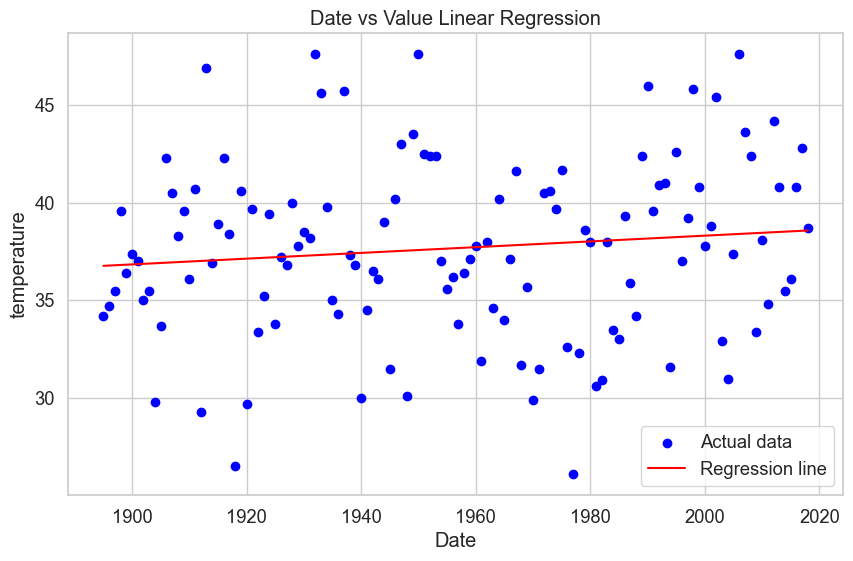

In [810]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, model.predict(x), color='red', label='Regression line')
plt.title('Date vs Value Linear Regression')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.legend()
plt.show()

### Section 2 - Test the Model

In [811]:
# Test the model
y_pred = model.predict(x_test)

In [812]:
# Evaluation metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Model Evaluation ===")
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.4f}")
print(f"Regression Equation: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")
print("\n=== Test Results ===")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

=== Model Evaluation ===
Slope (m): 0.0147
Intercept (b): 8.8920
Regression Equation: y = 0.0147x + 8.8920

=== Test Results ===
Mean Squared Error: 16.10
R-squared Score: 0.00


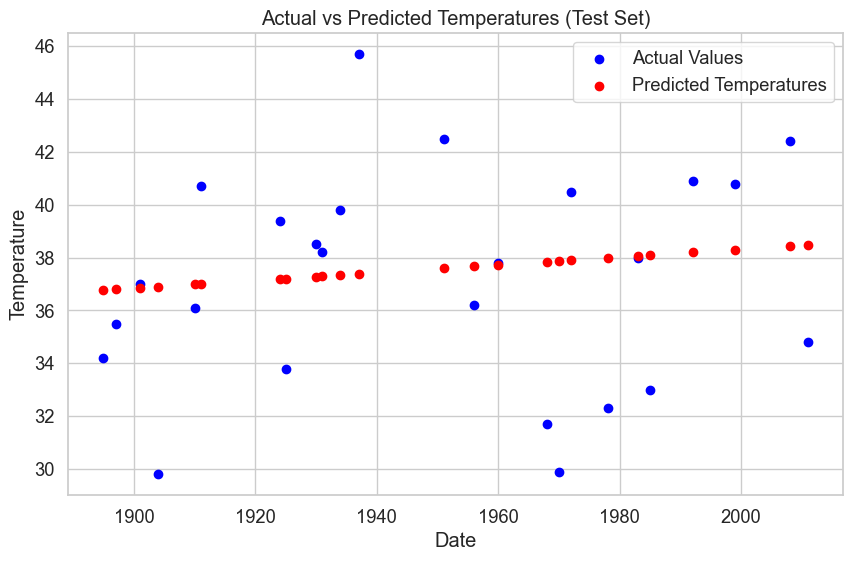

In [813]:
# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Values')
plt.scatter(x_test, y_pred, color='red', label='Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures (Test Set)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

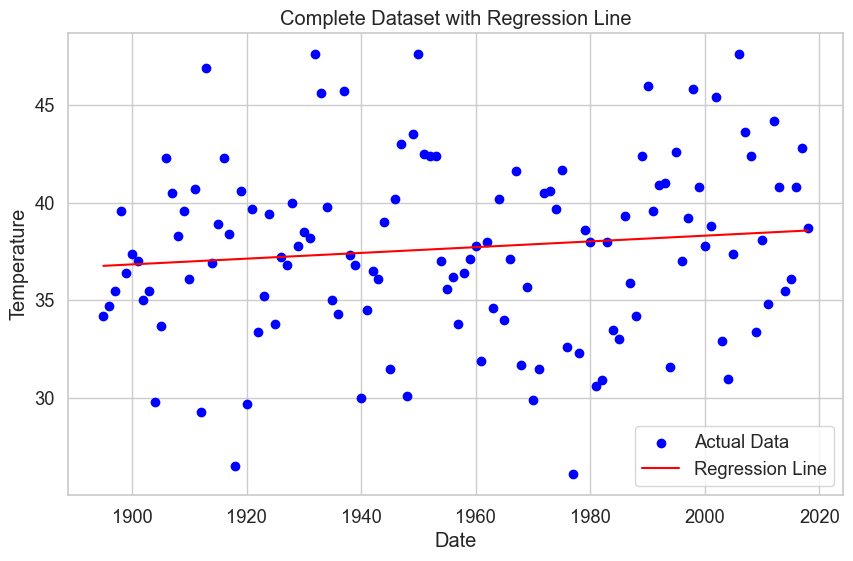

In [814]:
# Plotting the regression line with all data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.title('Complete Dataset with Regression Line')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### Section 3 - Predict

In [815]:
linear_regression = stats.linregress(x=df.Date,
                                     y=df.Temperature)


In [816]:
linear_regression.slope

np.float64(0.014771361132966163)

In [817]:
linear_regression.intercept

np.float64(8.694993233674289)

In [818]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 4 - Visualizations

(10.0, 70.0)

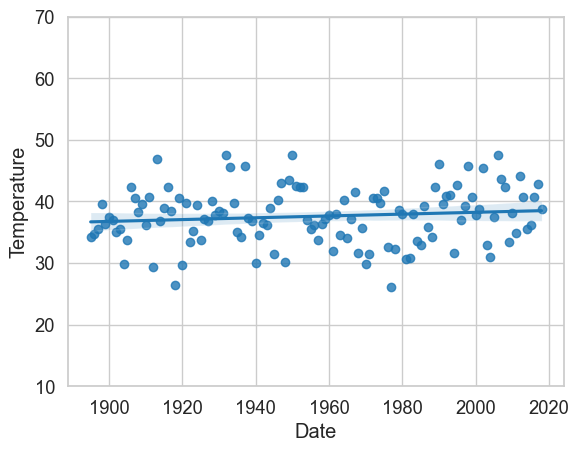

In [819]:
# Plotting the Average High Temperatures and a Regression Line
# import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=df.Date, y=df.Temperature)

axes.set_ylim(10, 70)

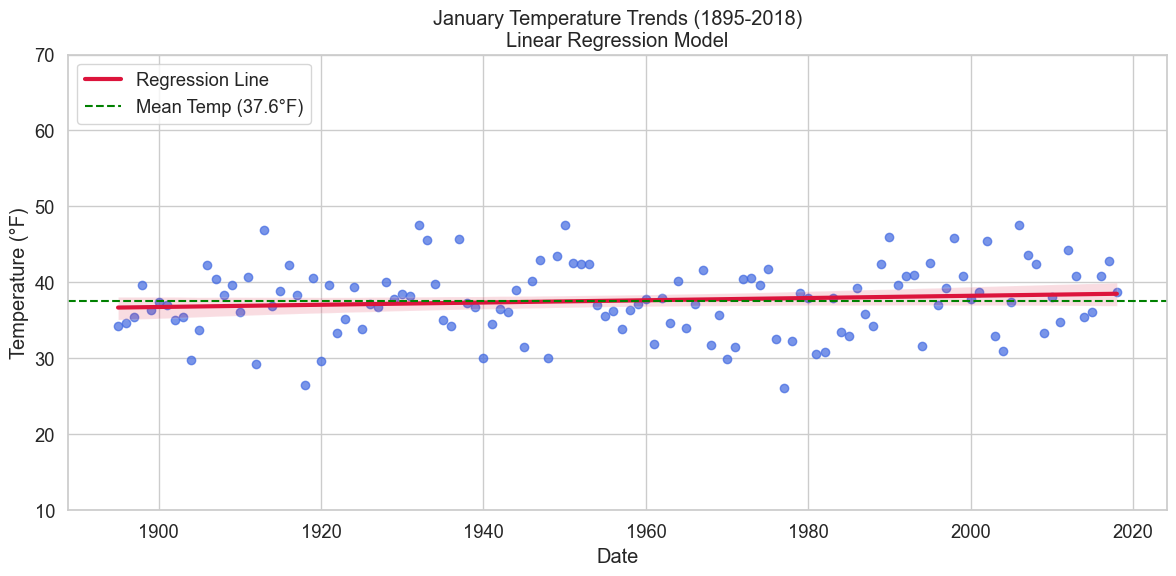

In [820]:
# Set style and context
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Create a clean DataFrame for plotting
plot_df = df[['Date', 'Temperature']].copy()
plot_df.columns = ['x', 'y']  # Simple column names for regplot

# Create the regression plot
plt.figure(figsize=(12, 6))
ax = sns.regplot(
    x='x', 
    y='y',
    data=plot_df,
    scatter_kws={
        'color': 'royalblue',
        'alpha': 0.7,
        'label': 'Actual Temperatures'
    },
    line_kws={
        'color': 'crimson',
        'linewidth': 3,
        'label': 'Regression Line'
    }
)

# Customize the plot
ax.set(
    title='January Temperature Trends (1895-2018)\nLinear Regression Model',
    xlabel='Date',
    ylabel='Temperature (°F)',
    ylim=(10, 70)
)

# Add reference lines and annotations
mean_temp = df['Temperature'].mean()
ax.axhline(y=mean_temp, color='green', linestyle='--', 
           label=f'Mean Temp ({mean_temp:.1f}°F)')

# Create proper prediction input to avoid warning
prediction_input = pd.DataFrame({'Date': [202401]})
predicted_temp = model.predict(prediction_input)[0]

ax.annotate(f'Predicted 2024: {predicted_temp:.1f}°F', 
            xy=(202401, predicted_temp),
            xytext=(198000, 25),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add legend and adjust layout
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()